<a href="https://colab.research.google.com/github/Sowmya74/ML-Projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Card Fraud Detection 2023 Dataset was collected from Kaggle.

This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

                                         Potential Usecases

Credit Card Fraud Detection: Build machine learning models to detect and prevent credit card fraud by identifying suspicious transactions based on the provided features.

Merchant Category Analysis: Examine how different merchant categories are associated with fraud.

Transaction Type Analysis: Analyze whether certain types of transactions are more prone to fraud than others.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filepath = '/content/drive/MyDrive/ML Projects Datasets/creditcard_2023.csv'
df = pd.read_csv(filepath)
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


**id:** Unique identifier for each transaction

**V1-V28:** Anonymized features representing various transaction attributes (e.g., time, location, etc.)

**Amount:** The transaction amount

**Class:** Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [3]:
df.shape

(568630, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [6]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.duplicated().sum()

0

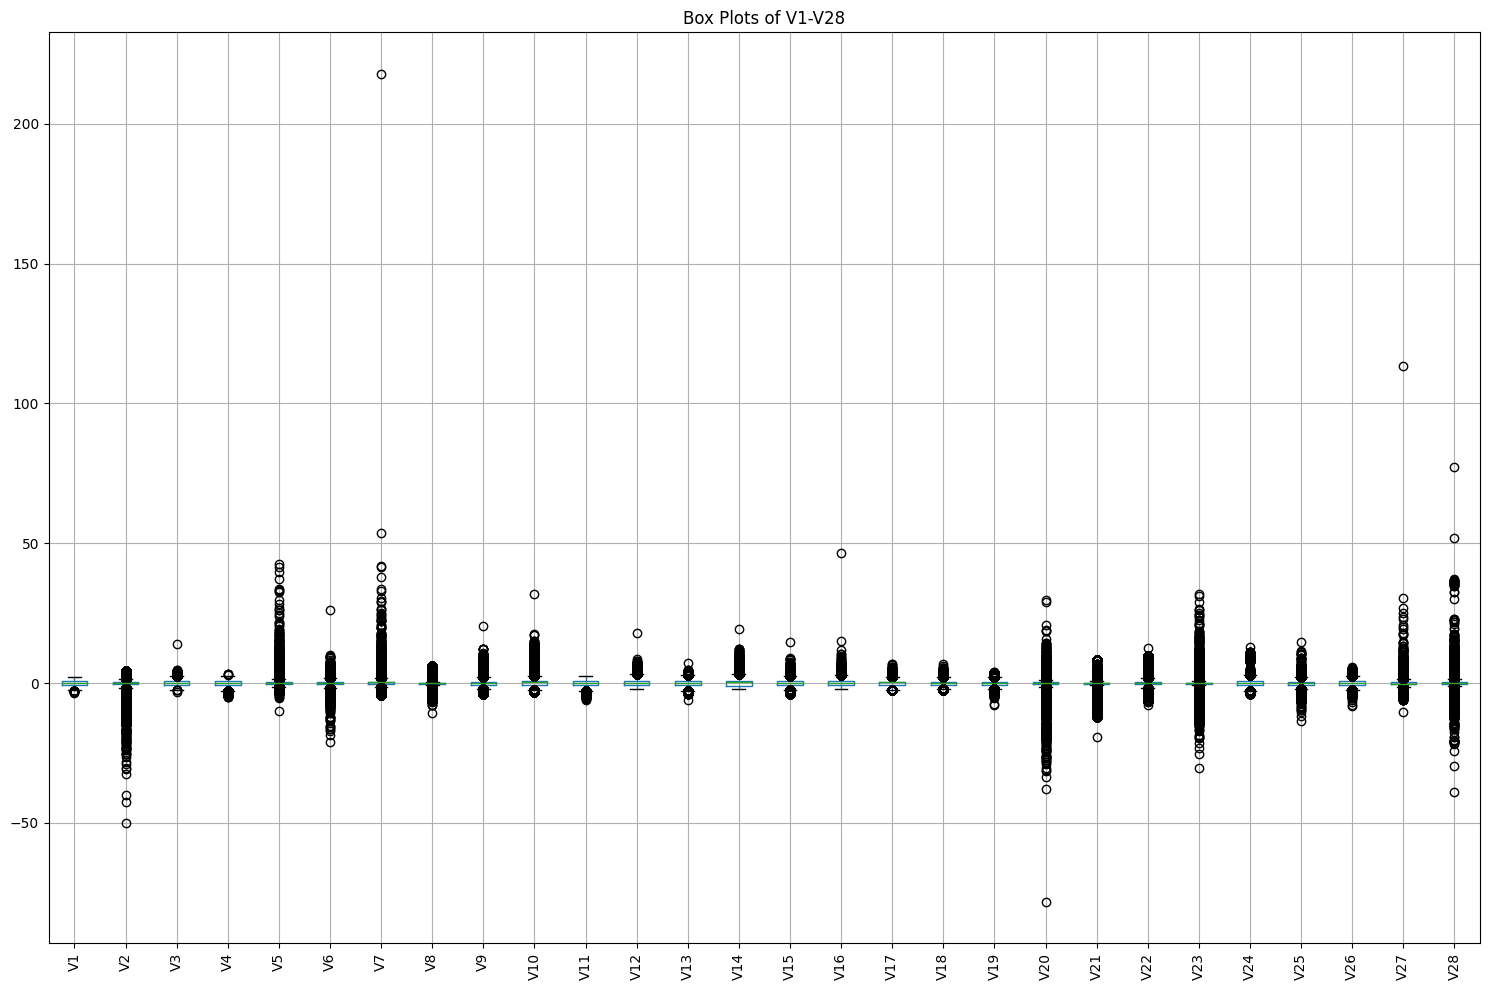

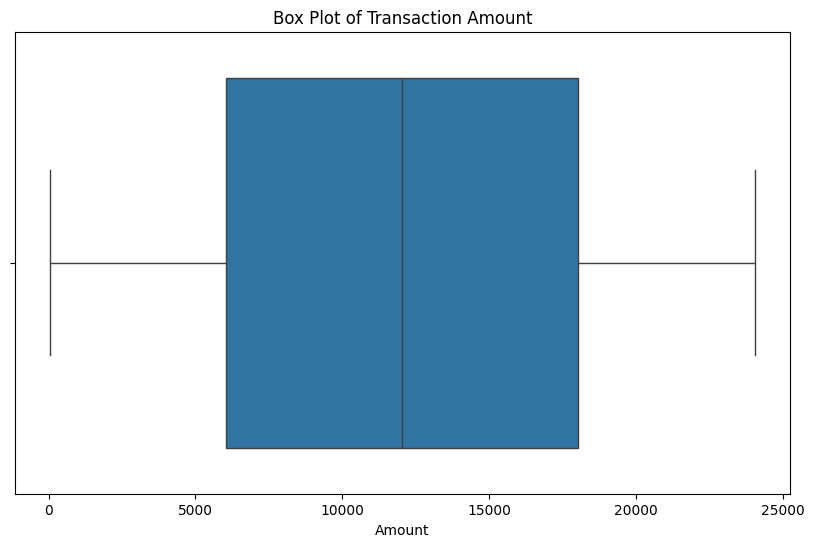

Potential outliers in Amount: 0


In [8]:
# Box plots for visualizing the outliers in the data
# Box plots for V1-V28
plt.figure(figsize=(15, 10))
df.iloc[:, 1:29].boxplot()
plt.title('Box Plots of V1-V28')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Box plot for Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Box Plot of Transaction Amount')
plt.show()

# Calculate IQR for Amount
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Potential outliers in Amount: {sum((df['Amount'] < lower_bound) | (df['Amount'] > upper_bound))}")

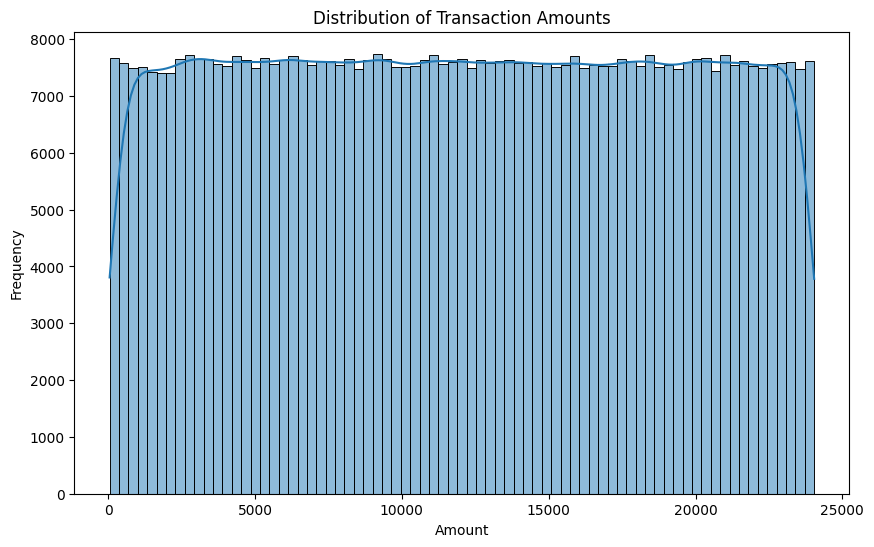

In [9]:
#to detect unusual spikes in the transaction amout

# Histogram for Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=75, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [10]:
#Finding top 5 highest transactions id and amount
df.sort_values(by='Amount', ascending=False).head(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
473871,473871,-2.003609,2.555784,-1.940124,2.230373,-2.394061,0.258814,-2.803543,-1.085524,-2.550775,...,-2.075900,2.656152,1.954903,1.119110,-1.213595,0.315536,-3.024185,-1.780374,24039.93,1
85369,85369,0.611042,-0.931258,0.952852,-0.417427,-0.240336,0.287658,0.308858,-0.138887,1.485640,...,-0.138827,-0.623633,-0.161532,0.956050,-0.092567,1.840501,-0.341237,0.039491,24039.93,0
15509,15509,0.885324,-0.390710,1.396938,0.279896,0.052628,0.848893,0.242502,-0.081163,0.390253,...,-0.119566,-0.066640,-0.052469,0.065289,0.437532,-0.086866,-0.195141,-0.036321,24039.88,0
182117,182117,-0.527290,-1.242163,1.264777,-1.873193,0.162135,0.512704,0.200468,0.050783,0.057827,...,0.093215,0.276951,0.037254,-1.808506,1.073427,-0.331210,-0.111580,-0.564679,24039.85,0
376626,376626,1.545755,-0.105446,-0.045556,0.688921,0.717605,0.456855,0.419760,-0.136542,0.085669,...,-0.037325,0.536180,-0.068546,0.510733,0.220525,0.573162,-0.203407,-0.006484,24039.82,1


In [11]:
#getting only id, amount AND CLASS features for the above top 5 highest transaction amount
df[['id','Amount','Class']].sort_values(by='Amount', ascending=False).head(5)

,id,Amount,Class
473871,473871,24039.93,1
85369,85369,24039.93,0
15509,15509,24039.88,0
182117,182117,24039.85,0
376626,376626,24039.82,1


In [12]:
#Class feature 0 and 1 count values
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

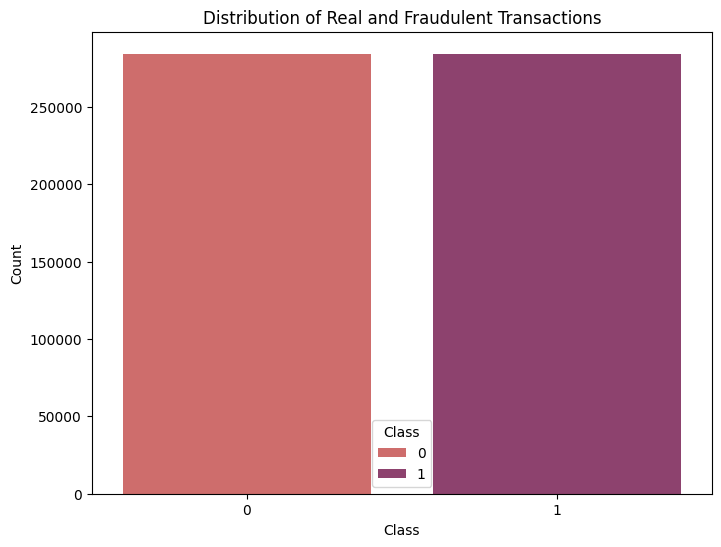

In [13]:
#visualization of fraudulent and real transactions with different colors
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='flare', hue= 'Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Real and Fraudulent Transactions')
plt.show()

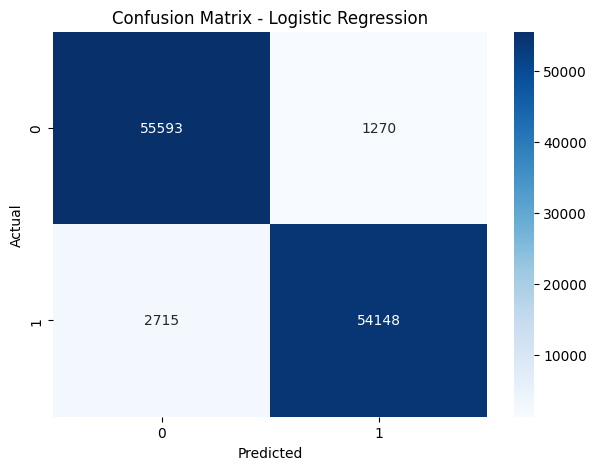

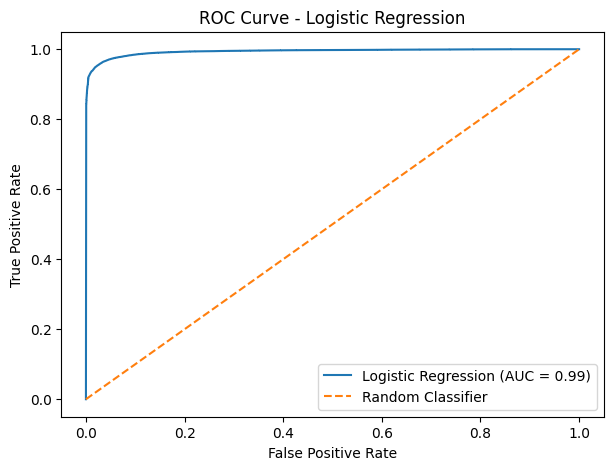

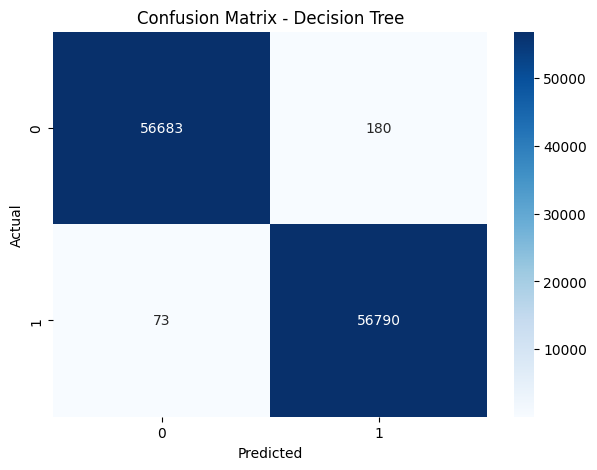

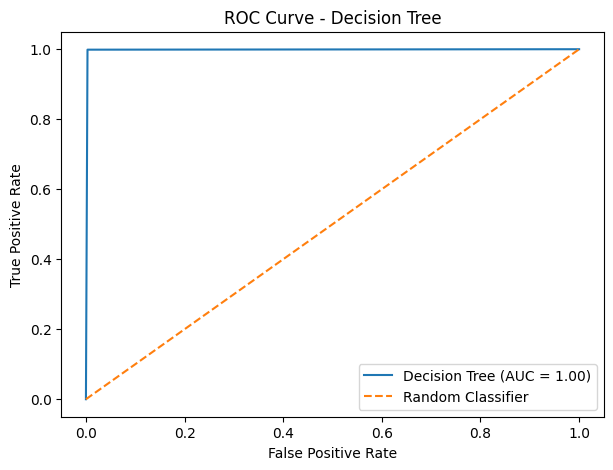

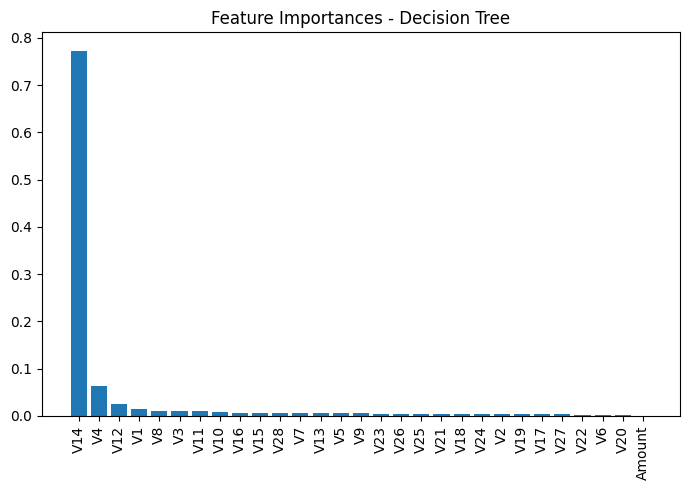

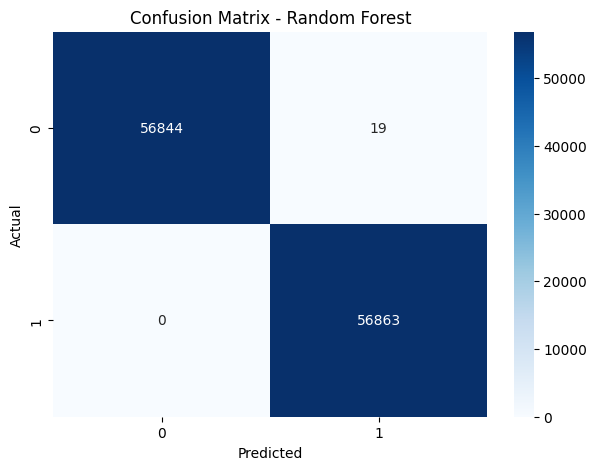

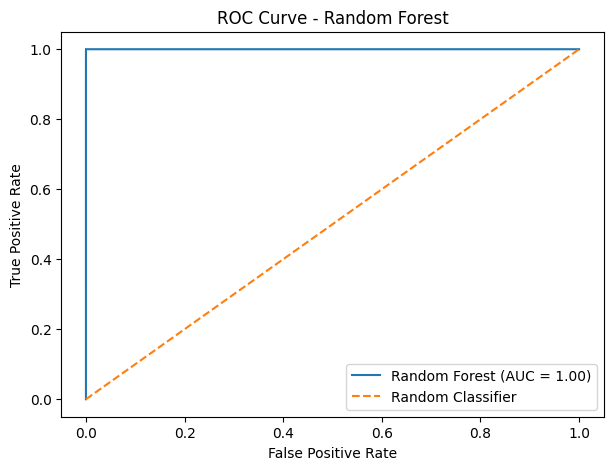

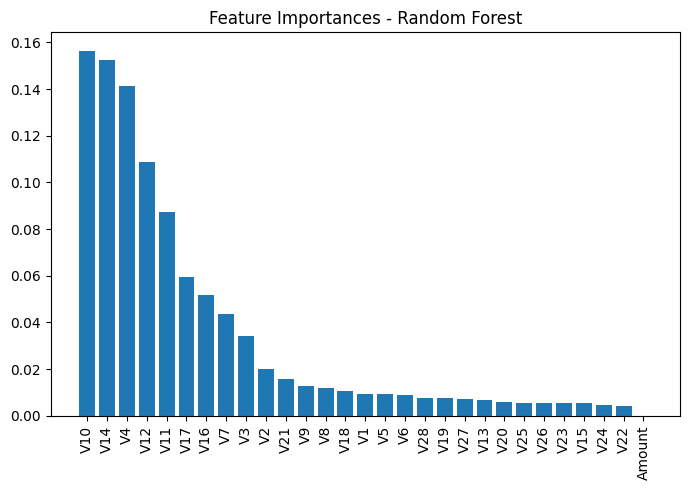

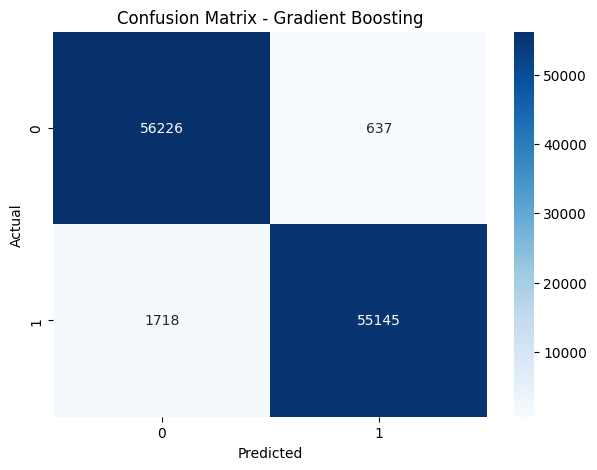

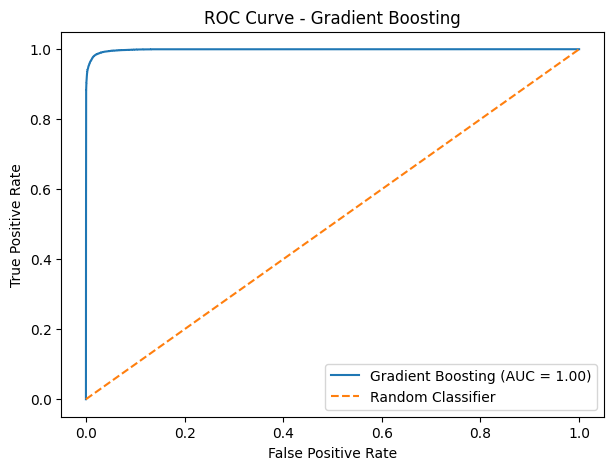

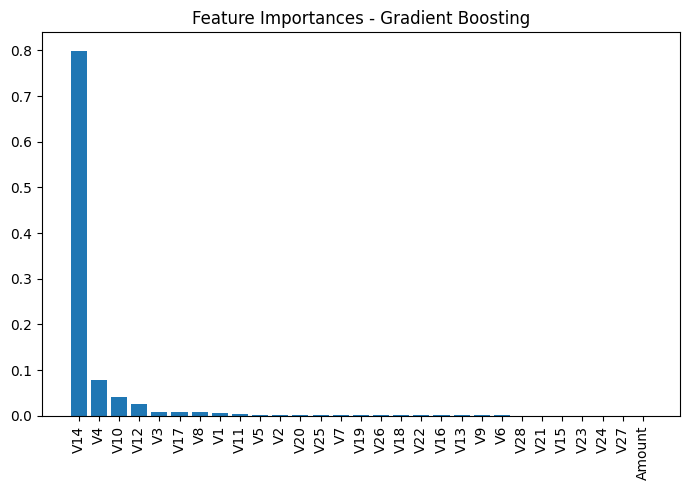

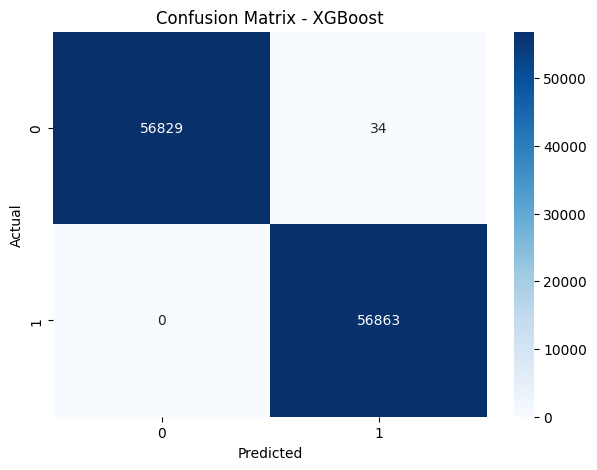

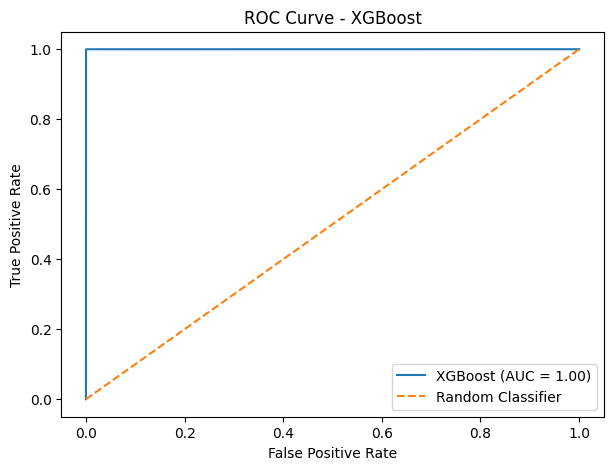

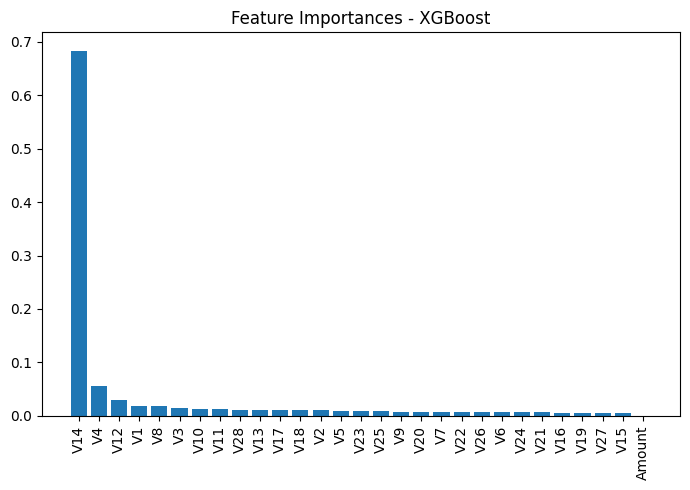

[LightGBM] [Info] Number of positive: 227452, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.134922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


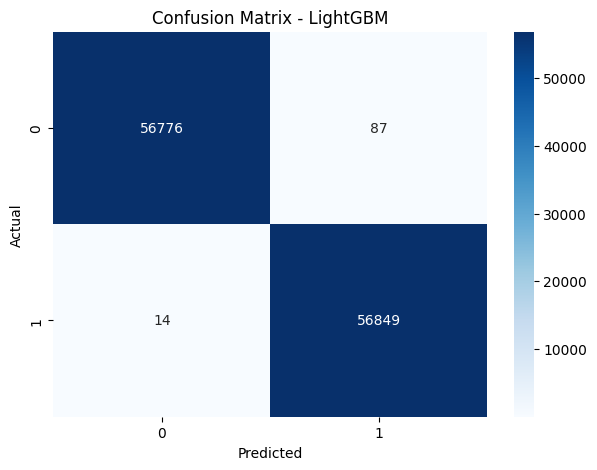

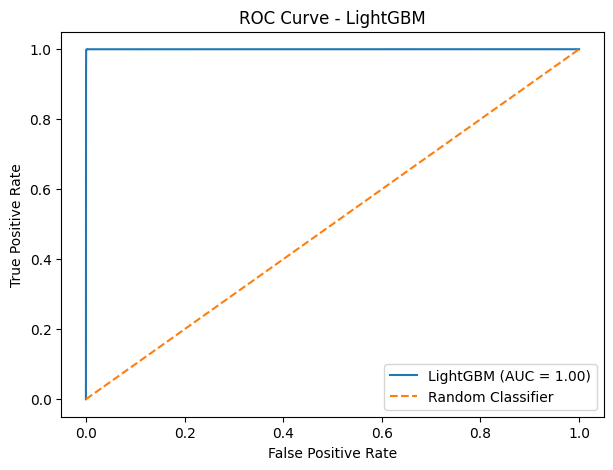

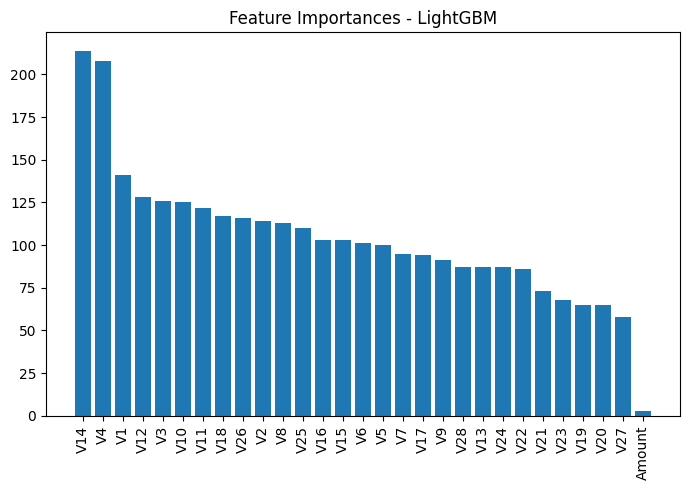

                 Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC  \
2        Random Forest  0.999833   0.999666  1.000000  0.999833  0.999990   
4              XGBoost  0.999701   0.999402  1.000000  0.999701  0.999982   
5             LightGBM  0.999112   0.998472  0.999754  0.999112  0.999811   
3    Gradient Boosting  0.979292   0.988581  0.969787  0.979094  0.998644   
1        Decision Tree  0.997775   0.996840  0.998716  0.997777  0.997775   
0  Logistic Regression  0.964960   0.977083  0.952254  0.964509  0.993507   

   Training Time  
2     462.202911  
4      12.069369  
5      14.678621  
3    1002.004688  
1      63.872897  
0       7.915467  


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve
import time



def train_evaluate_models(X, y, test_size=0.2, random_state=42):
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    # Scaling the features using standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Defining Various models
    models = {
        'Logistic Regression': LogisticRegression(random_state=random_state),
        'Decision Tree': DecisionTreeClassifier(random_state=random_state),
        'Random Forest': RandomForestClassifier(random_state=random_state, n_jobs=-1),
        'Gradient Boosting': GradientBoostingClassifier(random_state=random_state),
        'XGBoost': XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='logloss'),
        'LightGBM': LGBMClassifier(random_state=random_state)
    }

    results = []

    for name, model in models.items():
        start_time = time.time()

        # Training the model
        model.fit(X_train_scaled, y_train)

        # Making predictions
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

        # Calculating metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc_roc = roc_auc_score(y_test, y_pred_proba)

        end_time = time.time()
        training_time = end_time - start_time

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'AUC-ROC': auc_roc,
            'Training Time': training_time
        })
        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(7, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

        # Plot ROC curve
        from sklearn.metrics import roc_curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(7, 5))
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_roc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()

        # Feature importance (for tree-based models)
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]
            feature_names = X.columns

            plt.figure(figsize=(7, 5))
            plt.title(f"Feature Importances - {name}")
            plt.bar(range(X.shape[1]), importances[indices])
            plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
            plt.tight_layout()
            plt.show()

    return pd.DataFrame(results)
X = df.drop(['id', 'Class'], axis=1)
y = df['Class']
results_df = train_evaluate_models(X, y)

# Sorting results by AUC-ROC score
results_df = results_df.sort_values('AUC-ROC', ascending=False)

#Results
print(results_df)